<a href="https://colab.research.google.com/github/rodrigorissettoterra/Clustering-de-clientes/blob/main/Clustering_de_clientes_de_cart%C3%A3o_de_cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Referências utilizadas no projeto

Dataset do Kaggle: https://www.kaggle.com/datasets/arjunbhasin2013/ccdata


 A seguir está o Dicionário de dados para o conjunto de dados de cartão de crédito:

*   **CUST_ID** : Identificação do Titular do Cartão de Crédito (Categórica)
*   **BALANCE** : Valor do saldo deixado em sua conta para fazer compras
*   **BALANCE_FREQUENCY** : Com que frequência o Saldo é atualizado, pontuação entre 0 e 1 (1 = atualizado frequentemente, 0 = não atualizado com frequência)
*   **PURCHASES** : Quantidade de compras feitas na conta
*   **ONEOFF_PURCHASES** : Valor máximo de compra feito de uma só vez
*   **INSTALLMENTS_PURCHASES** : Valor da compra parcelada
*   **CASH_ADVANCE** : Dinheiro adiantado dado pelo usuário
*   **PURCHASES_FREQUENCY** : Com que frequência as Compras estão sendo feitas, pontue entre 0 e 1 (1 = compra frequentemente, 0 = não compra com frequência)
*   **ONEOFFPURCHASESFREQUENCY** : Com que frequência as compras acontecem de uma só vez (1 = comprado com frequência, 0 = comprado sem frequência)
*   **PURCHASESINSTALLMENTSFREQUENCY** : Com que frequência as compras parceladas estão sendo feitas (1 = frequentemente feito, 0 = não feito com frequência)
*   **CASHADVANCEFREQUENCY** : Com que frequência o dinheiro adiantado está sendo pago
*   **CASHADVANCETRX** : Quantidade de Transações realizadas com "Dinheiro Antecipado"
*   **PURCHASES_TRX** : Número de transações de compra feitas
*   **CREDIT_LIMIT** : Limite de Cartão de Crédito por usuário
*   **PAYMENTS** : Valor do pagamento feito pelo usuário
*   **MINIMUM_PAYMENTS** : Quantidade mínima de pagamentos feitos pelo usuário
*   **PRCFULLPAYMENT** : Porcentagem do pagamento integral pago pelo usuário
*   **TENURE** : Posse do serviço de cartão de crédito para o usuário

O dataset foi armazenado em: https://github.com/rodrigorissettoterra/Clustering-de-clientes/blob/main/CC_general.csv

#Preparando o ambiente

##Importando as bibliotecas necessárias

In [1]:
import pandas as pd

##Importando o dataset

In [2]:
dataframe = pd.read_csv('https://raw.githubusercontent.com/rodrigorissettoterra/Clustering-de-clientes/main/CC_general.csv')
dataframe.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


##Organizando os dados

###Removendo colunas que não serão necessárias

Remover as colunas de Identificação do cliente e tenure

In [3]:
dataframe.drop(columns=['CUST_ID', "TENURE"], inplace = True)
dataframe

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000


###Dados faltantes

In [4]:
print(dataframe.isna().sum())

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


Vamos substituir os valores faltantes com a mediana dos dados

In [5]:
dataframe.fillna(dataframe.median(),inplace = True)
print(dataframe.isna().sum())

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


###Normalizando os dados

Importando as bibliotecas necessárias

In [6]:
from sklearn.preprocessing import Normalizer

Normalizando os dados

In [7]:
values = Normalizer().fit_transform(dataframe.values)
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


#Executando o clustering

Importando as bibliotecas necessárias

In [8]:
from sklearn.cluster import KMeans

Criando o clustering

In [9]:
kmeans = KMeans(n_clusters = 5, n_init = 10, max_iter = 300)
y_pred = kmeans.fit_predict(values)

#Critérios de validação

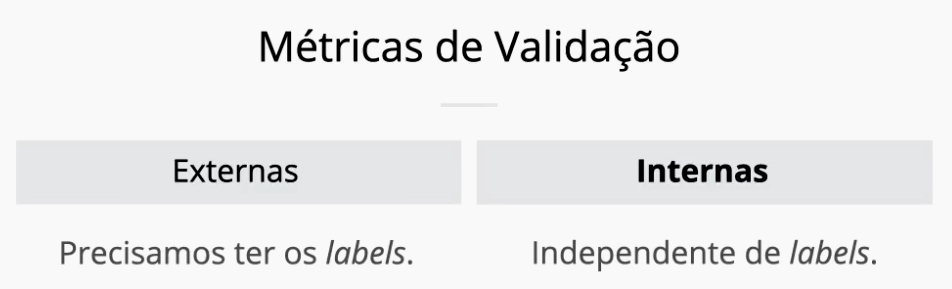

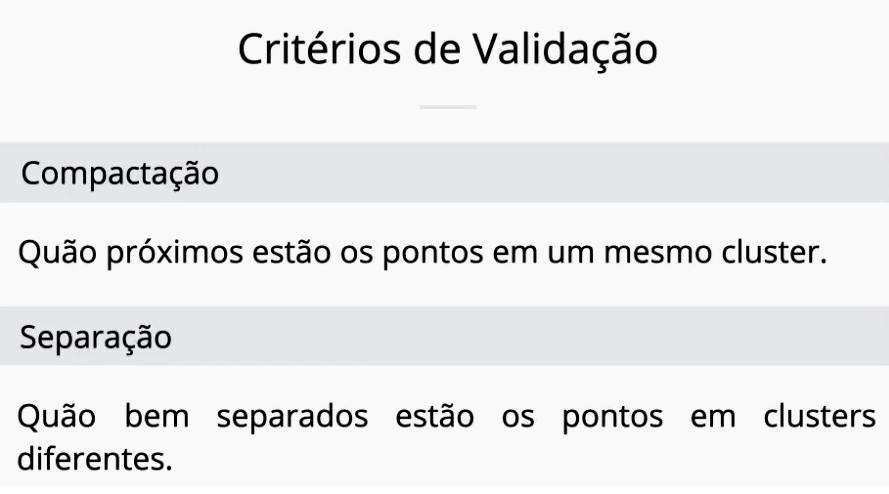

##Coeficiente de Silhouette

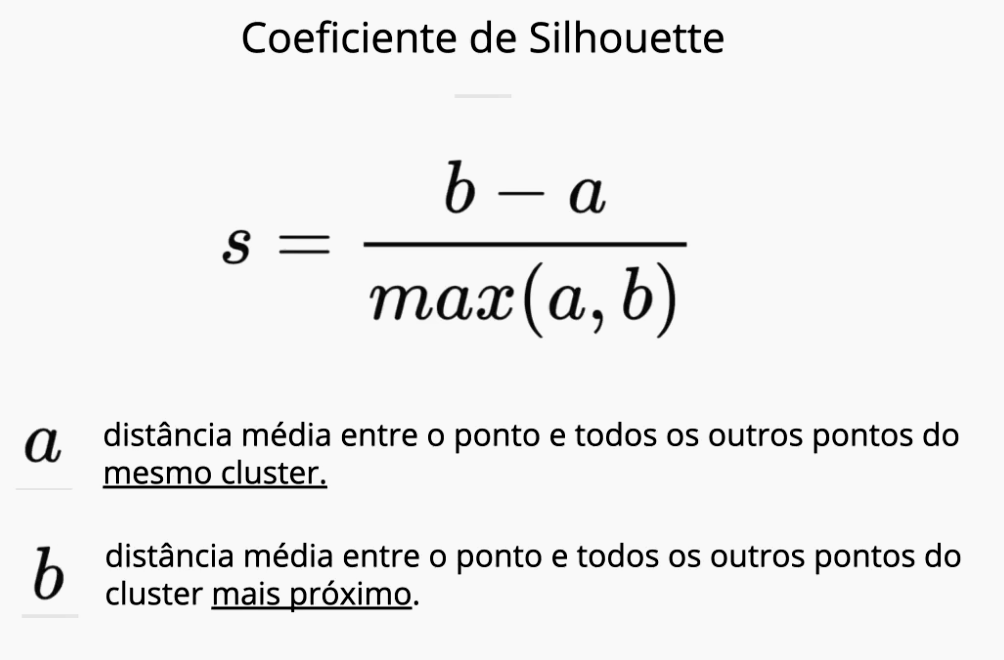

Importando as bibliotecas necessárias

In [10]:
from sklearn import metrics

Calculando o coeficiente de Silhouette

In [11]:
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric = 'euclidean')
print(silhouette)

0.36443927743081506


Como o coeficiente de Silhouette é maior que zero, podemos considerá-lo bom.

##Índice Davies-Bouldin

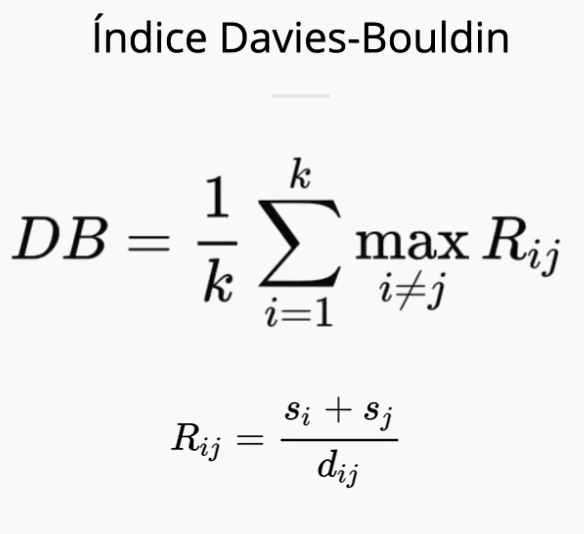

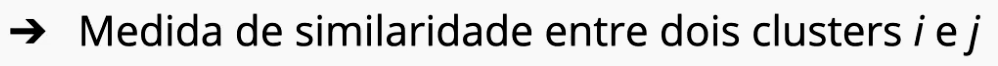

Onde:

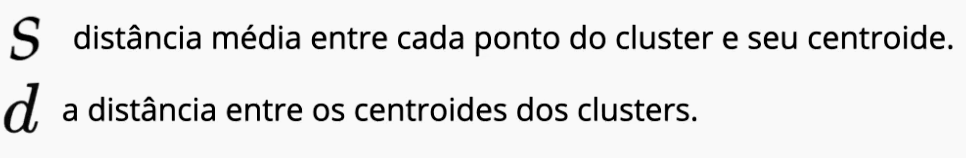

Caculando o índice de Davies-Bouldin

In [12]:
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

1.0758787031571042


Quanto mais próximo de 0, melhor, porém o valor calculado é aceitável.

##Índice Calinski-Harabasz

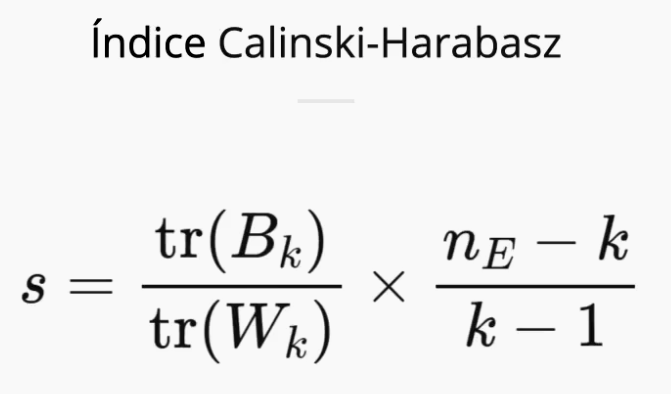

Onde:

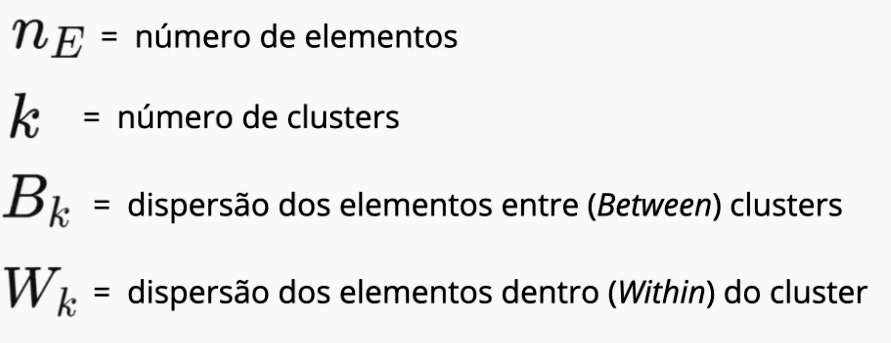

***B<sub>k</sub>*** pode ser escrita como:

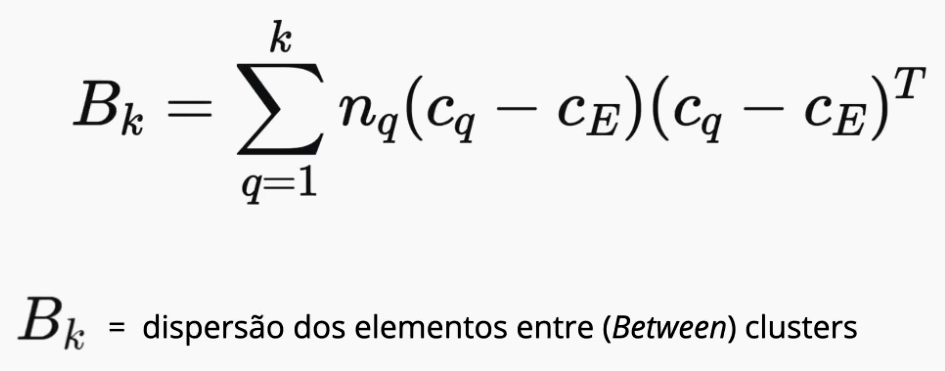

Onde:

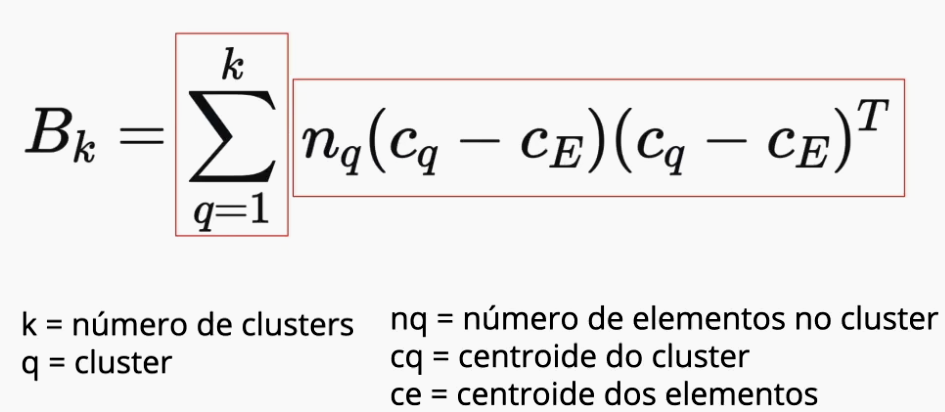

***W<sub>k</sub>*** pode ser escrita como:

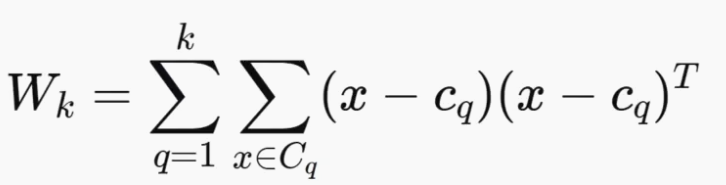

Onde:

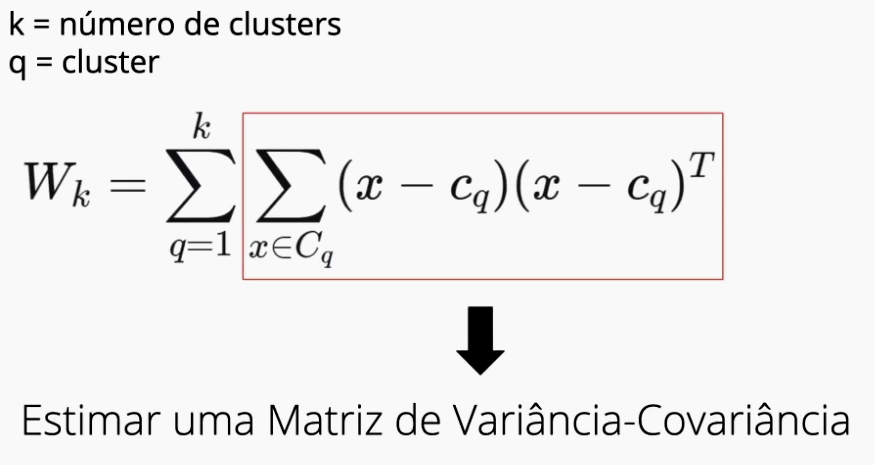

Calculando o Índice Calinski-Harabasz

In [13]:
calinski = metrics.calinski_harabasz_score(values, labels)
print(calinski)

3431.782548172111


##Comparação dos resultados

Criando uma função para exibir os resultados

In [14]:
def clustering_algorithm(n_clusters, dataset):
  kmeans = KMeans(n_clusters = n_clusters, n_init = 10, max_iter = 300)
  labels = kmeans.fit_predict(dataset)
  s = metrics.silhouette_score(dataset, labels, metric = 'euclidean')
  dbs = metrics.davies_bouldin_score(dataset, labels)
  calinski = metrics.calinski_harabasz_score(dataset, labels)
  return s, dbs, calinski

Para 3 clusters

In [15]:
s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)

0.3272203126696238 1.3096073640088426 3526.440519908274


Para 5 clusters

In [16]:
s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)

0.3645252169780562 1.0756224069224563 3431.798945679164


Para 10 clusters

In [17]:
s3, dbs3, calinski3 = clustering_algorithm(10, values)
print(s3, dbs3, calinski3)

0.35041408548815556 1.1187908203414065 3019.0377152196033


Criando um conjunto aleatório de dados, para comparar com o dataset normalizado

In [18]:
import numpy as np
random_data = np.random.rand(8950,16)
s4, dbs4, calinski4 = clustering_algorithm(5,random_data)
print(s4, dbs4, calinski4)
print(s1, dbs1, calinski1)

0.03981378086023251 3.5255526185248334 301.50853310356433
0.3272203126696238 1.3096073640088426 3526.440519908274


***Conclusão:*** nosso conjunto de dados tem melhores índices. 

##Estabilidade dos clusters

In [19]:
set5, set6, set7 = np.array_split(values, 3)
s5, dbs5, calinski5 = clustering_algorithm(5,set5)
s6, dbs6, calinski6 = clustering_algorithm(5,set6)
s7, dbs7, calinski7 = clustering_algorithm(5,set7)

print(s5, dbs5, calinski5)
print(s6, dbs6, calinski6)
print(s7, dbs7, calinski7)

0.36860891867648515 1.0563346979449357 1204.111582769171
0.3532728286985019 1.1428565512257924 1194.939735995847
0.36704188760608253 1.0984932613776763 1167.5309516804004


***Conclusão:*** Os conjuntos apresentam estabilidade.

#Interpretação visual

Importando as bibliotecas necessárias

In [20]:
import matplotlib.pyplot as plt

Visualizando a relação entre duas colunas "Purchases" e "Payments"

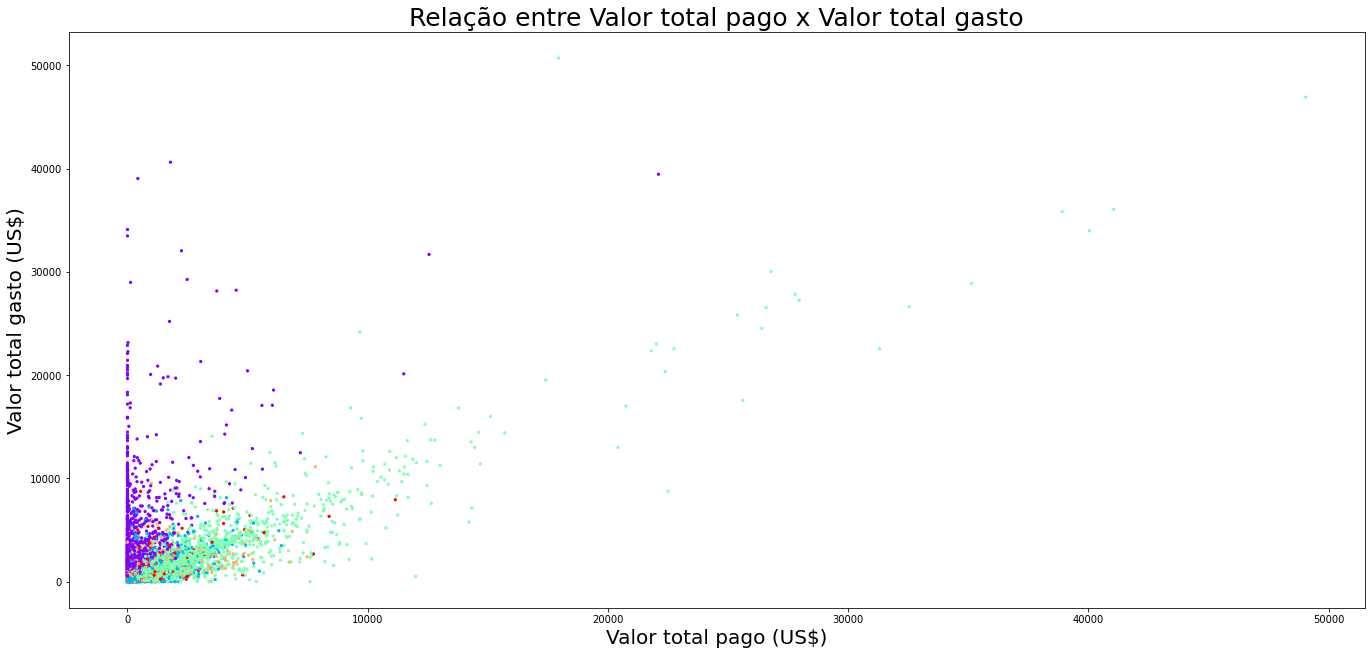

In [21]:
fig = plt.figure(figsize = (18,8))
fig.add_axes([0,0,1,1])
plt.scatter(dataframe['PURCHASES'], dataframe['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel('Valor total pago (US$)', fontsize = 20)
plt.ylabel('Valor total gasto (US$)', fontsize = 20)
plt.title('Relação entre Valor total pago x Valor total gasto', fontsize = 25)
plt.show()

Podemos verificar que: O cluster em ROXO representa os clientes que gastaram mais e pagaram menos. Já o cluster em VERDE são mais fiéis aos gastos e os pagamentos realizados.

#Interpretação estatística

In [22]:
dataframe['cluster'] = labels

In [23]:
dataframe.groupby('cluster').describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        1072.0  1794.024195  1982.950586   0.000000   506.925348   
1        3276.0   444.212219   846.809334   0.000000    23.287145   
2        1541.0  1140.395363  1663.836536   0.000000   209.490297   
3        2649.0  3037.962543  2478.838161   6.824905  1256.612223   
4         412.0  1987.146873  1852.215743  70.794108  1020.146724   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0        1087.920500  2308.762488  14581.459140            1072.0  0.862131   
1          82.992153   411.833075   9630.367575            3276.0  0.774280   
2         552.464447  1369.969909  19043.138560            1541.0  0.928099   
3        2174.018945  4223.867789  18495.558550            2649.0  0.963740   
4        1338.918346  2133.415063  11670.179850             412.0  0.989512   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...       884.718306  21235.065300           1072.0  0.117384   
1        ...       248.900782   4483.503862           3276.0  0.246293   
2        ...       523.422296  18621.013310           1541.0  0.279266   
3        ...      1330.593643   8345.641905           2649.0  0.001799   
4        ...      7086.774783  76406.207520            412.0  0.019271   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.186853  0.0  0.0  0.083333  0.142857  1.0  
1        0.346454  0.0  0.0  0.000000  0.444444  1.0  
2        0.367477  0.0  0.0  0.083333  0.545455  1.0  
3        0.023260  0.0  0.0  0.000000  0.000000  0.6  
4        0.090795  0.0  0.0  0.000000  0.000000  1.0  

[5 rows x 128 columns]

In [24]:
centroids = kmeans.cluster_centers_
print(centroids)

[[2.35141479e-01 2.16555293e-04 6.03857074e-02 3.44170171e-02
  2.59739049e-02 4.00128071e-01 5.26401668e-05 2.04882397e-05
  3.51921361e-05 6.54864556e-05 1.57199032e-03 1.12217156e-03
  5.35089146e-01 5.98040052e-01 1.04348171e-01 2.77498236e-05]
 [6.91172082e-02 2.30558192e-04 1.21221061e-01 4.79941328e-02
  7.33273099e-02 2.43612925e-02 1.72569863e-04 3.36877097e-05
  1.40000012e-04 7.93012041e-06 1.24086835e-04 2.85723913e-03
  9.43757893e-01 1.53487867e-01 5.68276323e-02 7.58208708e-05]
 [1.59738813e-01 2.45539530e-04 4.37899142e-01 2.56417561e-01
  1.81652647e-01 2.57868915e-02 2.04724593e-04 8.88180408e-05
  1.51100049e-04 9.36834144e-06 1.69378578e-04 6.17391999e-03
  6.04768068e-01 4.02440755e-01 8.52026617e-02 7.26174325e-05]
 [5.04289599e-01 2.72275541e-04 6.17031152e-02 3.61472866e-02
  2.55775500e-02 2.52998524e-01 6.73317111e-05 2.56982515e-05
  4.50750034e-05 5.74605324e-05 1.15731022e-03 1.33218565e-03
  7.19155598e-01 1.66164956e-01 1.79275871e-01 5.52512128e-07]
 [3.

Variância

In [25]:
max = len(centroids[0])
for i in range(max):
  print(dataframe.columns.values[i], '\n{:.4f}'.format(centroids[:,i].var()))

BALANCE 
0.0224
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0196
ONEOFF_PURCHASES 
0.0076
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0226
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0360
PAYMENTS 
0.0280
MINIMUM_PAYMENTS 
0.0542
PRC_FULL_PAYMENT 
0.0000


Atributos selecionados e seus respectivos Desvio Padrão:
*    BALANCE - 0.0224
*    PURCHASES - 0.0197
*    CASH_ADVANCE - 0.0225
*    CREDIT_LIMIT - 0.0360
*    PAYMENTS - 0.0279

In [26]:
description = dataframe.groupby('cluster')['BALANCE','PURCHASES','CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS']
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients

<ipython-input-26-52c7331c26a9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = dataframe.groupby('cluster')['BALANCE','PURCHASES','CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS']


#Interpretação dos clusters

In [27]:
description

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,n_clients
cluster,,,,,,
0,1794.024195,475.494823,3270.246792,3976.372399,4709.556601,1072
1,444.212219,629.173858,141.655729,5134.705973,814.396458,3276
2,1140.395363,3266.466710,182.900631,4096.794388,3034.900772,1541
3,3037.962543,385.248630,1636.917210,4495.771989,968.890376,2649
4,1987.146873,858.326286,420.107194,2226.699029,1338.974045,412


Analisando o poder de pagamento das faturas

In [28]:
dataframe.groupby('cluster')['PRC_FULL_PAYMENT'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1072.0,0.117384,0.186853,0.0,0.0,0.083333,0.142857,1.0
1,3276.0,0.246293,0.346454,0.0,0.0,0.000000,0.444444,1.0
2,1541.0,0.279266,0.367477,0.0,0.0,0.083333,0.545455,1.0
3,2649.0,0.001799,0.023260,0.0,0.0,0.000000,0.000000,0.6
4,412.0,0.019271,0.090795,0.0,0.0,0.000000,0.000000,1.0


#Conclusão

*    Cluster 0: Clientes com os ***maiores*** valores em gastos. 
 *   Valores consideráveis em saques.
 *   Piores pagadores.
*    Cluster 1: Clientes com os ***menores*** valores em gastos. 
 *   Os clientes deste cluster são os que possuem os ***menores*** valores de saque.
 *   Os clientes deste cluster são os que possuem os ***maiores*** limites de crédito.
 *   Bons pagadores.
*    Cluster 2: Clientes com os ***maiores*** valores em pagamentos.
 *   Melhores pagadores.
*    Cluster 3: Clientes com os ***maiores*** valores de saque.
 *   Foco no saque.
*    Cluster 4: São os clientes mais regulares, com os ***menores*** limites de créditos.